# Neural Networks
In the previous exercise, you implemented <strong>feedforward propagation</strong> for neural networks and used it to predict handwritten digits with the weights we provided. In this exercise, you will implement the <strong>backpropagation</strong> algorithm to learn the parameters for the neural network.<br><br>

In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The <strong>neural network</strong> will be able to represent complex models that form <strong>non-linear hypotheses</strong>. For this week, you will be using parameters from <strong>a neural network that we have already trained</strong>. In this exercise, you will write the backpropagation algorithm for learning the neural network parameters.<br><br>

The file <strong><em>ex4data1</em></strong> contains a training set.<br>
The structure of the dataset described blow:<br>
1. X array = <strong>400 columns describe the values of pixels of 20*20 images in flatten format for 5000 samples</strong>
2. y array = <strong>Value of image (number between 0-9)</strong>


<br><br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Converting .mat to .csv
    2. Loading Dataset and Trained Neural Network Weights
    3. Ploting Data
2. Model Representation
3. Feedforward Propagation and Prediction
    1. Encoding y labels (onehot)
    2. Cost and Gradient Function
</strong>

In each section full description provided.

## 1. Visualizing the Dataset
Before starting on any task, it is often useful to understand the data by visualizing it.<br>

### 1.A Converting .mat to .csv
In this specific assignment, the instructor added a .mat file as training set and weights of trained neural network. But we have to convert it to .csv to use in python.<br>
After all we now ready to import our new csv files to pandas dataframes and do preprocessing on it and make it ready for next steps.

In [1]:
# import libraries
import scipy.io
import numpy as np

data = scipy.io.loadmat("ex4data1")
weights = scipy.io.loadmat('ex4weights')

Now we <strong>extract x and y</strong> variables from the .mat file and save them into .csv file for further usage. After running the below code <strong>you should see X.csv and y.csv files</strong> in your directory.

In [2]:
for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),data[i],delimiter=',')
        
for i in weights:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),weights[i],delimiter=',')

### 1.B Loading Dataset and Trained Neural Network Weights
First we import .csv files into pandas dataframes then save them into numpy arrays.<br><br>
There are <strong>5000 training examples</strong> in ex3data1.mat, where each training example is a <strong>20 pixel by 20 pixel <em>grayscale</em> image of the digit</strong>. Each pixel is represented by a floating point number indicating the <strong>grayscale intensity</strong> at that location. The 20 by 20 grid of pixels is <strong>"flatten" into a 400-dimensional vector</strong>. <strong>Each of these training examples becomes a single row in our data matrix X</strong>. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.<br><br> <img src='img/x.jpg'>
The second part of the training set is a <strong>5000-dimensional vector y that contains labels</strong> for the training set.<br><br>
<strong>Notice: In dataset, the digit zero mapped to the value ten. Therefore, a "0" digit is labeled as "10", while the digits "1" to "9" are labeled as "1" to "9" in their natural order.<br></strong>
But this make thing harder so we bring it back to natural order for 0!

In [3]:
# import library
import pandas as pd

# saving .csv files to pandas dataframes
x_df = pd.read_csv('X.csv',names= np.arange(0,400))
y_df = pd.read_csv('y.csv',names=['label'])

In [4]:
# saving .csv files to pandas dataframes
Theta1_df = pd.read_csv('Theta1.csv',names = np.arange(0,401))
Theta2_df = pd.read_csv('Theta2.csv',names = np.arange(0,26))

In [5]:
# saving x_df and y_df into numpy arrays
x = x_df.iloc[:,:].values
y = y_df.iloc[:,:].values

m, n = x.shape

# bring back 0 to 0 !!!
y = y.reshape(m,)
y[y==10] = 0
y = y.reshape(m,1)

print('#{} Number of training samples, #{} features per sample'.format(m,n))

#5000 Number of training samples, #400 features per sample


In [6]:
# saving Theta1_df and Theta2_df into numpy arrays
theta1 = Theta1_df.iloc[:,:].values
theta2 = Theta2_df.iloc[:,:].values

### 1.C Plotting Data
You will begin by visualizing a subset of the training set. In first part, the code <strong>randomly selects selects 100 rows from X</strong> and passes those rows to the <strong>display_data</strong> function. This function maps each row to a 20 pixel by 20 pixel grayscale image and displays the images together.<br>
After plotting, you should see an image like this:<img src='img/plot.jpg'>

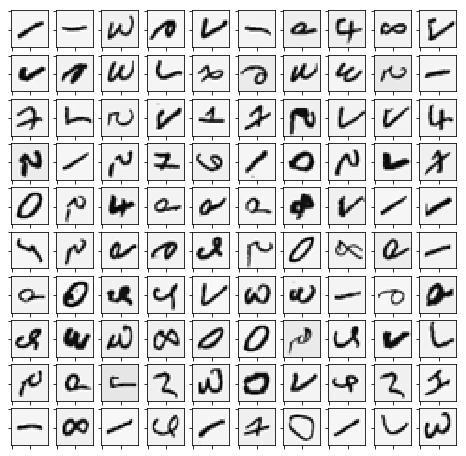

[ 1.  1.  3.  6.  7.  1.  9.  7.  8.  7.  7.  6.  3.  7.  8.  6.  3.  3.
  5.  1.  4.  7.  5.  7.  4.  4.  5.  7.  7.  7.  5.  1.  5.  4.  2.  1.
  0.  5.  7.  4.  0.  5.  7.  9.  9.  9.  8.  7.  1.  1.  2.  5.  9.  6.
  2.  5.  0.  8.  9.  1.  9.  0.  2.  2.  7.  3.  3.  1.  6.  9.  2.  3.
  3.  8.  0.  0.  5.  2.  7.  7.  5.  9.  7.  4.  3.  0.  7.  2.  4.  4.
  1.  8.  1.  2.  1.  4.  0.  1.  7.  3.]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

amount = 100
lines = 10
columns = 10
image = np.zeros((amount, 20, 20))
number = np.zeros(amount)

for i in range(amount):
    rnd = random.randint(0,4999)
    image[i] = x[rnd].reshape(20, 20)
    y_temp = y.reshape(m,)
    number[i] = y_temp[rnd]
fig = plt.figure(figsize=(8,8))

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(image[i], cmap='binary')
plt.show()
print(number)

# 2. Model Representation
Our neural network is shown in below figure. It has <strong>3 layers an input layer, a hidden layer and an output layer</strong>. Recall that our <strong>inputs are pixel</strong> values of digit images. Since the images are of <strong>size 20×20</strong>, this gives us <strong>400 input layer units</strong> (excluding the extra bias unit which always outputs +1).<br><br><img src='img/nn.jpg'><br>
You have been provided with a set of <strong>network parameters (Θ<sup>(1)</sup>; Θ<sup>(2)</sup>)</strong> already trained by instructor.<br><br>
<strong>Theta1 and Theta2 The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).</strong>

In [15]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
lambda_ = 1


In [8]:
print('theta1 shape = {}, theta2 shape = {}'.format(theta1.shape,theta2.shape))

theta1 shape = (25, 401), theta2 shape = (10, 26)


It seems our weights are transposed, so we transpose them to have them in a way our neural network is.

In [9]:
theta1 = theta1.transpose()
theta2 = theta2.transpose()
print('theta1 shape = {}, theta2 shape = {}'.format(theta1.shape,theta2.shape))

theta1 shape = (401, 25), theta2 shape = (26, 10)


<strong>Becuase the initial dataset has changed and mapped 0 to "10", so the weights also are changed. So we just rotate columns one step to right, to predict correct values.<br>
Recall we have changed mapping 0 to "10" to 0 to "0" but we cannot detect this mapping in weights of neural netwrok. So we have to this rotation on final output of probabilities.</strong>

In [28]:
def rotate_column(array):
    array_ = np.zeros(shape=(m,num_labels))
    temp = np.zeros(num_labels,)
    temp= array[:,9]
    array_[:,1:10] = array[:,0:9]
    array_[:,0] = temp
    return array_

# 3. Feedforward Propagation and Cost Function
Now you will implement the cost function and gradient for the neural network.<br>

You should implement the feedforward computation that computes <strong>h<sub>θ</sub>(x<sup>(i)</sup>)</strong> for every example i and <strong>sum the cost over all examples</strong>.

The matrices <strong>Theta1 and Theta2 contain the parameters for each unit in rows.</strong> Specifically, the first row of Theta1 corresponds to the first hidden unit in the second layer. <br>
You must get <strong>a<sup>(l)</sup></strong> as a column vector.<br>
You can use a for-loop over the examples to compute the cost.<br><br>

### 3.A Encoding y Labels (onehot) 
Recall that whereas the original labels (in the variable y) were 1, 2, ..., 10, for the purpose of training a neural network, we need to <strong>recode the labels</strong> as vectors containing only values 0 or 1, so that: <img src='img/y.jpg'><br><br>
For example, if x<sup>(i)</sup> is an image of the digit 5, then the corresponding y<sup>(i)</sup> (that you should use with the cost function) should be a 10-dimensional vector with y<sub>5</sub> = 1, and the other elements equal to 0.<br><br>
For encoding y labels, we use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a>.

In [10]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(categorical_features='all',sparse=False) # encode all labels form 0 to 9
y = one_hot_encoder.fit_transform(y)

In [11]:
print('y.shape={}\ny[0]={}\ny[500]={} and ...'.format(y.shape,y[0],y[500]))

y.shape=(5000, 10)
y[0]=[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
y[500]=[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] and ...


### 3.B Cost and Gradient Function
`compute_cost(theta_flatten,x,y,lambda_,input_layer_size,hidden_layer_size,num_labels):` implements the neural network cost function for a two layer
neural network which performs classification.<br>
The returned parameter `grad` should be a <strong>"unrolled"</strong> vector of the <strong>partial derivatives </strong>of the neural network. <br><br>
Recall that the cost function for the neural network (with regularization) is: <img src='img/j_reg.jpg'><br><br>
where <strong>h<sub>θ</sub>(x<sup>(i)</sup>)</strong> is computed as shown in the section 2 and <strong>K = 10 is the total number of possible labels</strong>. Note that <strong>h<sub>θ</sub>(x<sup>(i)</sup>)<sub>k</sub> = a<sup>(3)</sup><sub>k</sub></strong> is the activation (output value) of the k-th output unit.<br>

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
def hypothesis(x,theta):
    return np.dot(x,theta)

<strong>Implementation Note:</strong> The matrix X contains the examples in rows. When you complete the code, <strong>you will need to add the column of 1’s</strong> to the matrix.

In [27]:
# adding column of 1's to x
x = np.append(np.ones(shape=(m,1)),x,axis = 1)

In [29]:
a1 = x
a2 = np.zeros(shape=(hidden_layer_size+1,hidden_layer_size))
a3 = np.zeros(shape=(hidden_layer_size+1,num_labels))

In [70]:
def compute_cost(theta_flatten,x,y,lambda_,input_layer_size,hidden_layer_size,num_labels):
    theta_flatten = theta_flatten.reshape(1,-1)

    theta_hidden = theta_flatten[0,0:((input_layer_size+1)*hidden_layer_size)]
    theta_hidden = theta_hidden.reshape((input_layer_size+1),hidden_layer_size)
    
    theta_output = theta_flatten[0,((input_layer_size+1)*hidden_layer_size):]
    theta_output = theta_output.reshape(hidden_layer_size+1,num_labels)
    
    z2 = np.dot(a1,theta_hidden)
    a2 = sigmoid(z2)
    
    # adding column of 1's to a2
    a2 = np.append(np.ones(shape=(m,1)),a2,axis = 1)
    z3 = np.dot(a2,theta_output)
    a3 = sigmoid(z3) # a3 = h(x) w.r.t theta
    
    term1 = np.dot(-y.transpose(),(np.log(a3))) - np.dot((1-y).transpose(),(np.log(1 - a3)))
    term2 = lambda_*(np.sum(theta_output**2)+np.sum(theta_hidden**2))/(2*m)
    j = np.sum(term1)/m+term2
    print(np.sum(term1))
    print(term1.shape)
    return j

You should see that the <strong>cost is about 0.287629</strong>.

In [73]:
flatten_theta = np.append(theta1,theta2)
cost_test = compute_cost(theta_flatten=flatten_theta,x=x,y=y,lambda_=0,input_layer_size=input_layer_size,
                        hidden_layer_size=hidden_layer_size,num_labels= num_labels)

446830.820691
(10, 10)


In [74]:
cost_test

89.366164138271614